# Thông tin sinh viên

Họ tên: Nguyễn Nguyên Khôi

MSSV: 21521009

Bài tập số 5

Ngày thực hiện 12-4-2023

# Yêu cầu 1:

Áp dụng phân đoạn ảnh cho các ảnh:

Chọn ngưỡng: global

• particles.bmp

• Phandoan01.jpg

• wdg2.jpg

In [1]:
import os
import cv2 
import numpy as np
from scipy import ndimage
from google.colab.patches import cv2_imshow
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [3]:
dir_dataset = '/gdrive/MyDrive/CS231.N22.KHCL/Baitap/Baitap5/images/'
particles_path = os.path.join(dir_dataset, 'particles.bmp')
Phandoan01_path = os.path.join(dir_dataset, 'Phandoan01.jpg')
wdg2_path = os.path.join(dir_dataset, 'wdg2.jpg')
rice_path = os.path.join(dir_dataset, 'rice.png')
wdg3_path = os.path.join(dir_dataset, 'wdg3.jpg')
son1_path = os.path.join(dir_dataset, 'son1.jpg')
vegetables_path = os.path.join(dir_dataset, 'vegetables.jpg')
hand_path = os.path.join(dir_dataset, 'hand.jpg')
thuoc_path = os.path.join(dir_dataset, 'thuoc.jpg')

In [4]:
def drawHist(x):
  hist = cv2.calcHist([x], [0], None, [256], [0, 256])
  plt.plot(hist)
  plt.xlim([0, 256])
  plt.legend(('histogram'), loc = 'upper left')
  plt.show() 

In [5]:
def globalThresholding(img, thres=127):
  img_rst = img.copy()
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      if img_rst[i][j] < thres:
        img_rst[i][j] = 255
      else:
        img_rst[i][j] = 0
  return img_rst

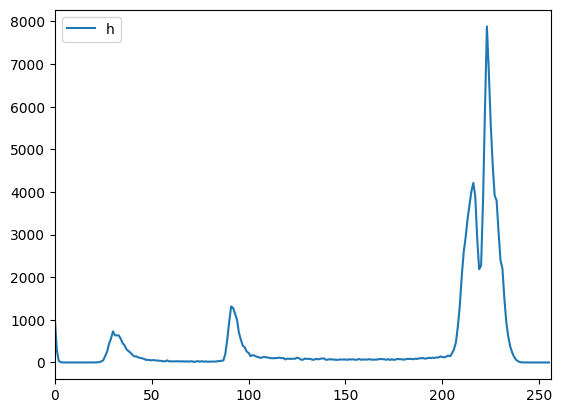

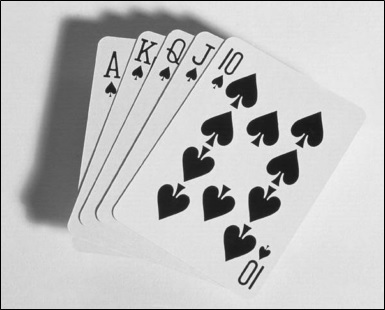

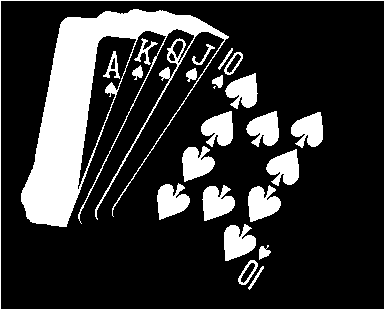

In [6]:
Phandoan01 = cv2.imread(Phandoan01_path, 0)
global_Phandoan01 = globalThresholding(Phandoan01, 160)
drawHist(Phandoan01)
cv2_imshow(Phandoan01)
cv2_imshow(global_Phandoan01)

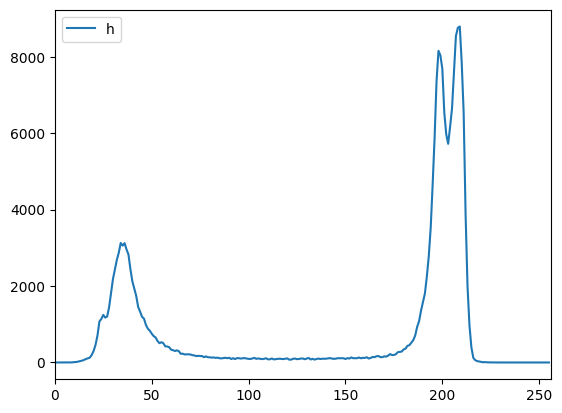

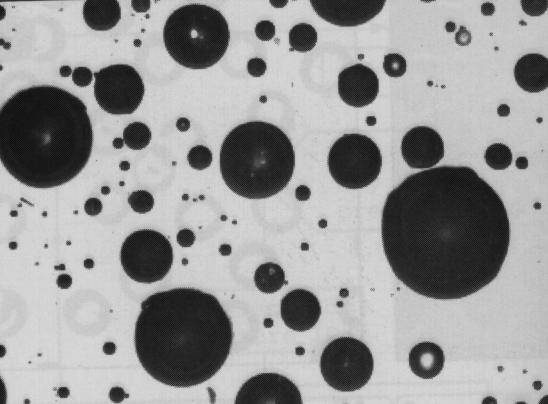

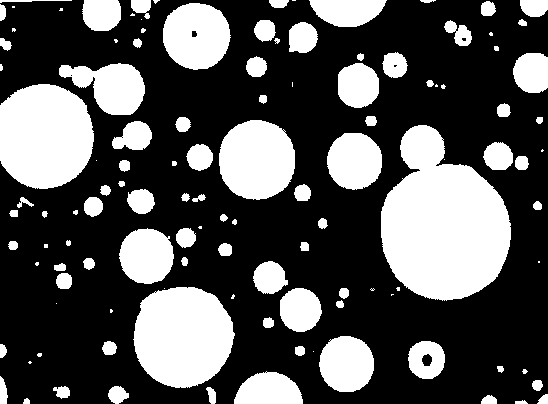

In [7]:
particles = cv2.imread(particles_path, 0)
global_particles = globalThresholding(particles, 170)
drawHist(particles)
cv2_imshow(particles)
cv2_imshow(global_particles)

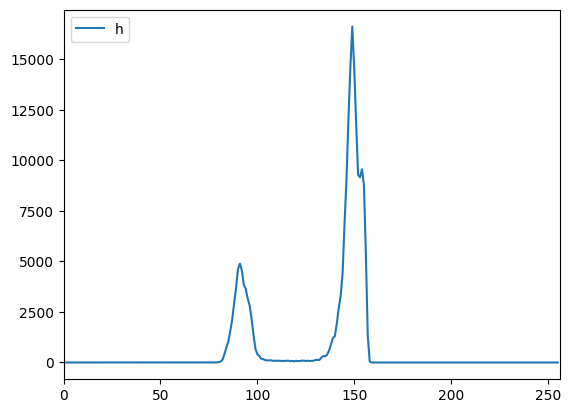

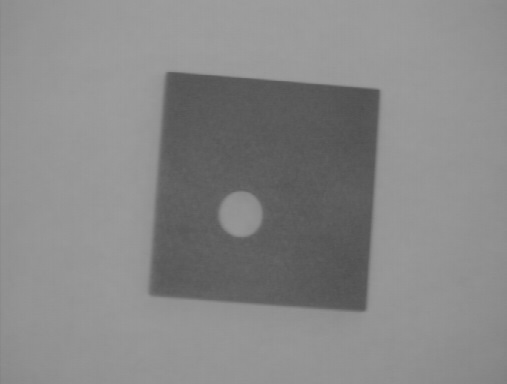

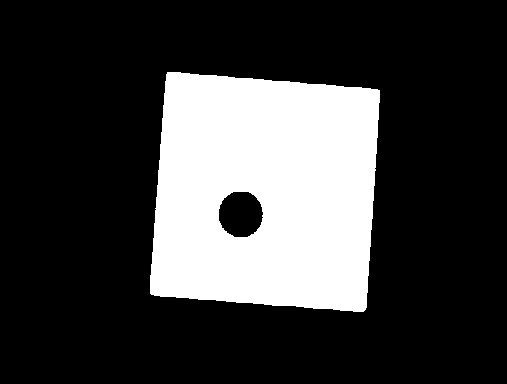

In [8]:
wdg2 = cv2.imread(wdg2_path, 0)
global_wdg2 = globalThresholding(wdg2, 120)
drawHist(wdg2)
cv2_imshow(wdg2)
cv2_imshow(global_wdg2)

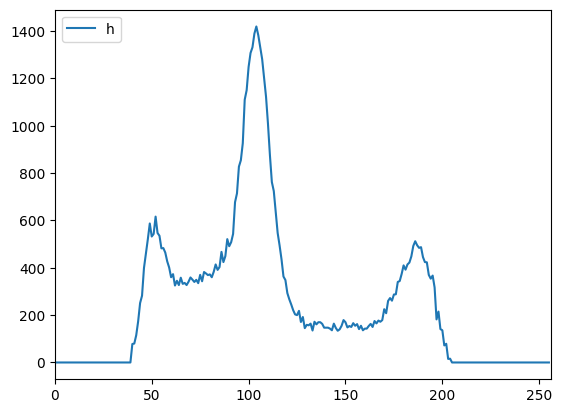

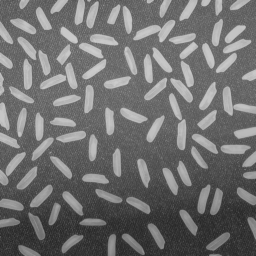

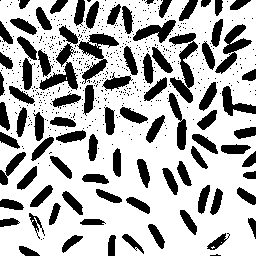

In [21]:
rice = cv2.imread(rice_path, 0)
global_rice = globalThresholding(rice, 120)
drawHist(rice)
cv2_imshow(rice)
cv2_imshow(global_rice)

# Yêu cầu 2
Chọn ngưỡng: Adaptive

• Ảnh wdg3.jpg



In [10]:
def adaptiveThresholding(f, nrow, ncol):
  g = f.copy()
  r = int(f.shape[0] / nrow)
  c = int(f.shape[1] / ncol)
  for i in range(int(nrow)):
    for j in range(int(ncol)):
      x = f[i * r : (i + 1) * r, j * c : (j + 1) * c]
      #cv2_imshow(x)
      #drawHist(x)
      t = np.average(x)
      #t = int(input())
      g[i * r : (i + 1) * r, j * c : (j + 1) * c] = globalThresholding(x, t)
  return g

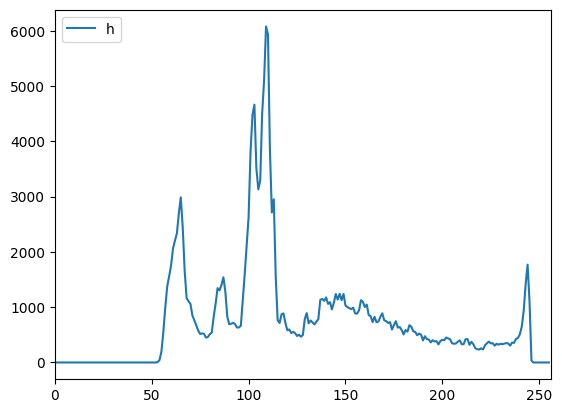

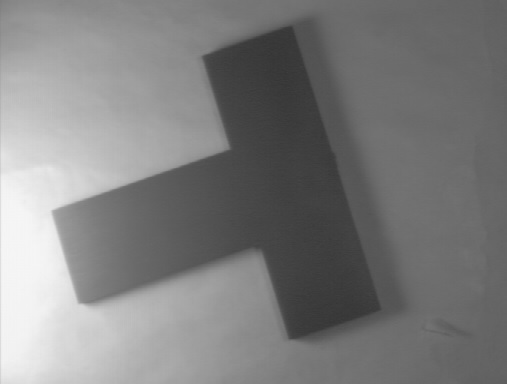

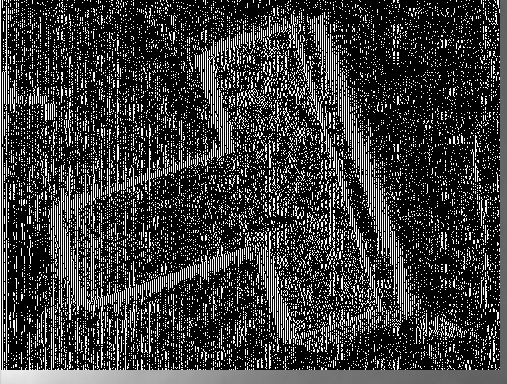

In [11]:
wdg3 = cv2.imread(wdg3_path, 0)
adapt_wdg3 = adaptiveThresholding(wdg3, 370, 250)
drawHist(wdg3)
cv2_imshow(wdg3)
cv2_imshow(adapt_wdg3)

**Áp dụng thuật toán K-means**

Representing each pixel as (r,g,b)

– Áp dụng cho ảnh: vegetables.jpg, hand.jpg, thuoc.jpg

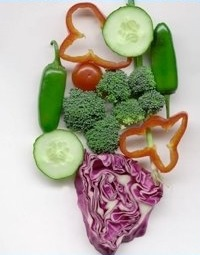

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


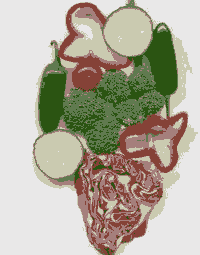

In [12]:
vegetables = cv2.imread(vegetables_path)
cv2_imshow(vegetables)

nrow, ncol,nchl = vegetables.shape
g = vegetables.reshape(nrow*ncol,nchl)

from sklearn.cluster import KMeans
k_means = KMeans(n_clusters = 6, random_state = 0).fit(g)

t = k_means.cluster_centers_[k_means.labels_]
img_res = t.reshape(nrow, ncol, nchl)
cv2_imshow(img_res)

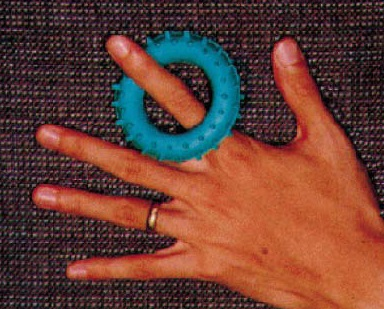

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


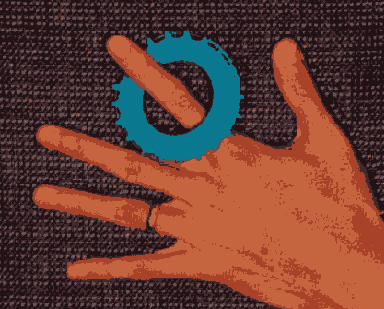

In [13]:

hand = cv2.imread(hand_path)
cv2_imshow(hand)

nrow, ncol,nchl = hand.shape
g = hand.reshape(nrow*ncol,nchl)

from sklearn.cluster import KMeans
k_means = KMeans(n_clusters = 6, random_state = 0).fit(g)

t = k_means.cluster_centers_[k_means.labels_]
img_res = t.reshape(nrow, ncol, nchl)
cv2_imshow(img_res)

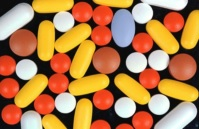

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


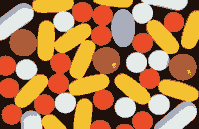

In [14]:
thuoc = cv2.imread(thuoc_path)
cv2_imshow(thuoc)

nrow, ncol,nchl = thuoc.shape
g = thuoc.reshape(nrow*ncol,nchl)

k_means = KMeans(n_clusters = 6, random_state = 0).fit(g)

t = k_means.cluster_centers_[k_means.labels_]
img_res = t.reshape(nrow, ncol, nchl)
cv2_imshow(img_res)

Representing each pixel as (r,g,b)

– Áp dụng cho ảnh: vegetables.jpg, hand.jpg, thuoc.jpg

In [15]:
def Kmeans2(img, n_clusters = 6):
             
  img_tmp = img.copy()
  nrow, ncol,nchl = img.shape

  g = []
  for y in range(nrow):
    for x in range(ncol):
      tmp = [img_tmp[y,x][0], img_tmp[y,x][1], img_tmp[y,x][2], x, y]
      g.append(tmp)

  k_means = KMeans(n_clusters=n_clusters, random_state=0).fit(g)
  # t = k_means.cluster_centers_[k_means.labels_]

  arrcolor = np.random.rand(20,3) * 255
  t = arrcolor[k_means.labels_]

  img_res = img_tmp
  i = 0
  for y in range(nrow):
    for x in range(ncol):
      img_res[y, x] = t[i][0:3]
      i += 1

  return img_res

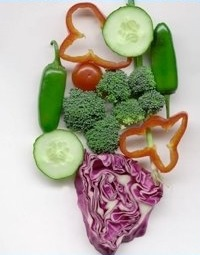

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


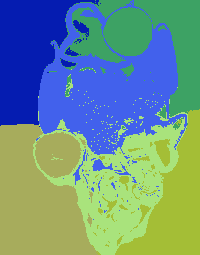

In [16]:
cv2_imshow(vegetables)
cv2_imshow(Kmeans2(vegetables))

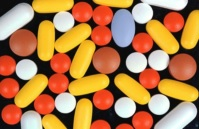

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


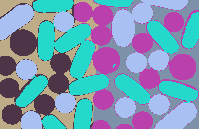

In [17]:
cv2_imshow(thuoc)
cv2_imshow(Kmeans2(thuoc))